In [ ]:
'''
Overall we estimate to have borrowed 60% of code for our PPO

It was inspired and adapated from the follwoing sources:
    https://pylessons.com/LunarLander-v2-PPO/
    https://github.com/bentrevett/pytorch-rl/blob/master/5a%20-%20Proximal%20Policy%20Optimization%20(PPO)%20%5BLunarLander%5D.ipynb
    https://github.com/ericyangyu/PPO-for-Beginners/blob/master/ppo.py
'''  

In [1]:
# This code runs the PPO in the chosen environment
# It also prints information about the training and testing
# Graphs are generated from the results using matplotlib
# The code in this file specifically for plotting and running batches is mostly borrowed

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from PPO import PPO

In [3]:
# Creates new environment as Lunar Lander V2 
env = gym.make("LunarLander-v2")
env.seed(1234)
ppo = PPO(env) 

EPISODES = 1000
N_TRIALS = 25
PRINT_EVERY = 10
REWARD_THRESHOLD = 100

cpu


In [4]:
train_rewards = []
test_rewards = []

mean_train_rewards = []
mean_test_rewards = []

In [5]:
for e in range(1, EPISODES+1):
    
    policy_loss, value_loss, score = ppo.run()
    
    test_reward = ppo.evaluate()
    
    train_rewards.append(score)
    test_rewards.append(test_reward)
    
    mean_train_reward = np.mean(train_rewards[-N_TRIALS:])
    mean_test_reward = np.mean(test_rewards[-N_TRIALS:])
    
    mean_train_rewards.append(mean_train_reward)
    mean_train_rewards.append(mean_test_reward)
    
    if e % PRINT_EVERY == 0:
        
        print(f'| Episode: {e:3} | Mean Train Reward: {mean_train_reward:7.1f} | Mean Test Reward: {mean_test_reward:7.1f} |')
    
    if mean_test_reward >= REWARD_THRESHOLD:
        
        print(f'Reached reward threshold in {e} episodes')
        
        break

D:\CITY Masters\AI Term 2\INM707\Coursework\707_Coursework\Task 3\PPO.py:195: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  value_loss = torch.tensor(value_loss, dtype = float, requires_grad = True)


| Episode:  10 | Mean Train Reward:  -131.0 | Mean Test Reward:  -218.1 |
| Episode:  20 | Mean Train Reward:  -157.6 | Mean Test Reward:  -173.1 |
| Episode:  30 | Mean Train Reward:  -167.7 | Mean Test Reward:  -181.6 |
| Episode:  40 | Mean Train Reward:  -174.6 | Mean Test Reward:  -171.4 |
| Episode:  50 | Mean Train Reward:  -138.0 | Mean Test Reward:  -199.1 |
| Episode:  60 | Mean Train Reward:  -120.8 | Mean Test Reward:  -246.5 |
| Episode:  70 | Mean Train Reward:  -140.7 | Mean Test Reward:  -212.9 |
| Episode:  80 | Mean Train Reward:  -139.8 | Mean Test Reward:  -192.3 |
| Episode:  90 | Mean Train Reward:  -129.2 | Mean Test Reward:  -203.9 |
| Episode: 100 | Mean Train Reward:  -114.3 | Mean Test Reward:  -284.3 |
| Episode: 110 | Mean Train Reward:  -104.3 | Mean Test Reward:  -355.0 |
| Episode: 120 | Mean Train Reward:  -120.7 | Mean Test Reward:  -401.1 |
| Episode: 130 | Mean Train Reward:  -120.8 | Mean Test Reward:  -323.6 |
| Episode: 140 | Mean Train Reward:   

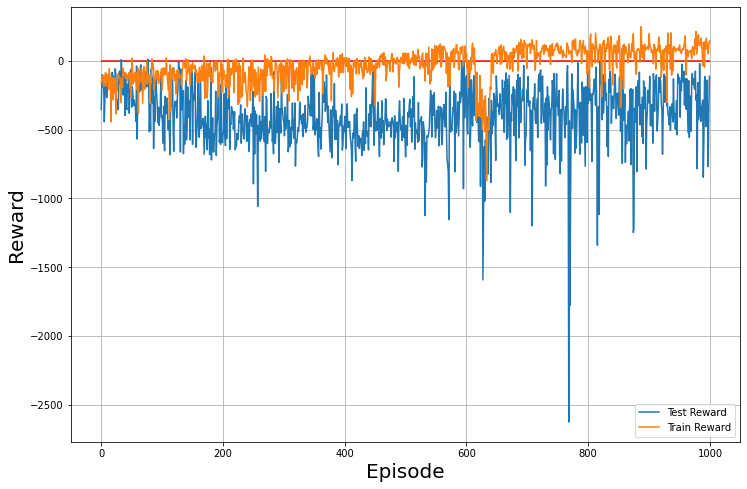

In [6]:
plt.figure(figsize=(12,8))
plt.plot(test_rewards, label='Test Reward')
plt.plot(train_rewards, label='Train Reward')
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Reward', fontsize=20)
plt.hlines(0, 0, len(test_rewards), color='r')
plt.legend(loc='lower right')
plt.grid()

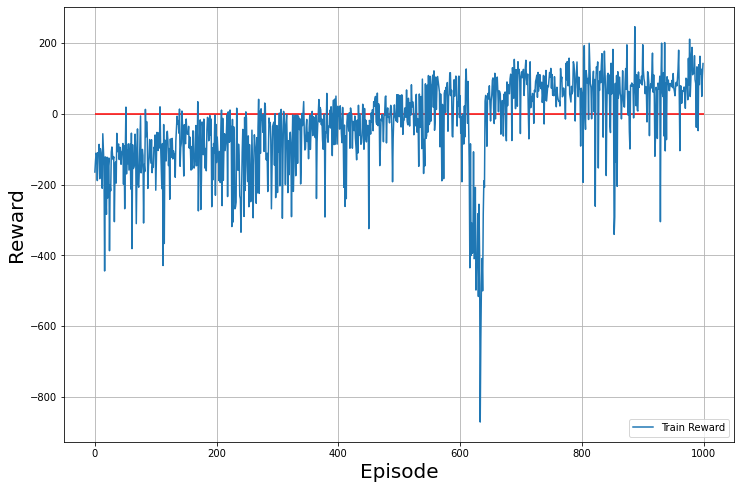

In [7]:
plt.figure(figsize=(12,8))
plt.plot(train_rewards, label='Train Reward')
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Reward', fontsize=20)
plt.hlines(0, 0, len(test_rewards), color='r')
plt.legend(loc='lower right')
plt.grid()